In [12]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Carregar os Datasets

In [13]:
# URL pro raw csv que ta no git
url_bom = './datasets/oficial/mov_bom/david/myo-movimento-david-2019-06-14 10:20:51-.csv'
# Dataset is now stored in a Pandas Dataframe
url_ruim = './datasets/oficial/mov_ruim/david/myo-movimento-david-ruim-2019-06-14 10:41:12-.csv'

#Pandas dataset
Dataset_bom = pd.read_csv(url_bom)
Dataset_ruim = pd.read_csv(url_ruim)

print("Dataset Bom")
print (Dataset_bom.head())

print("\nDataset Ruimn")
print (Dataset_ruim.head())


Dataset Bom
   Unnamed: 0  Gyro 0  Gyro 1  Gyro 2  Label  Orientation 0  Orientation 1  \
0           0    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
1           1    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
2           2    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
3           3    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   
4           4    -8.0     2.0    27.0    1.0        -8081.0       -13068.0   

   Orientation 2  Orientation 3  Sensor 0  Sensor 1  Sensor 2  Sensor 3  \
0         2098.0        -5290.0      -7.0     -13.0      -5.0      -2.0   
1         2098.0        -5290.0     -11.0     -11.0      -1.0       6.0   
2         2098.0        -5290.0      -2.0       7.0      12.0       0.0   
3         2098.0        -5290.0       1.0      24.0      44.0      19.0   
4         2098.0        -5290.0      12.0      18.0      -2.0       0.0   

   Sensor 4  Sensor 5  Sensor 6  Sensor 7  Timestamp  
0     -18.0  

# Plot dos sensores do movimento bom

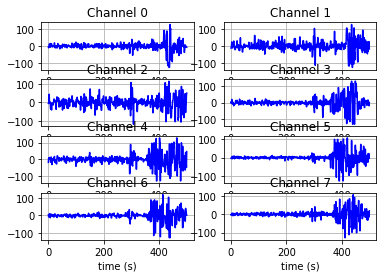

In [14]:
ax = np.linspace(0, 500, 500, endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset_bom.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

# Plot dos sensores do movimento ruim

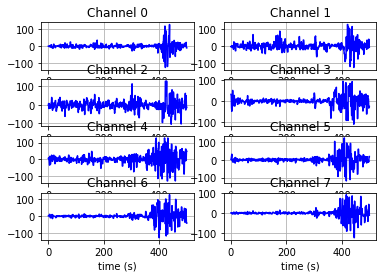

In [15]:
ax = np.linspace(0, 500, 500, endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset_ruim.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

# Plot da grafico bom filtrado

# Filtro 

# Plot da fft dos sensores do movimento ruim

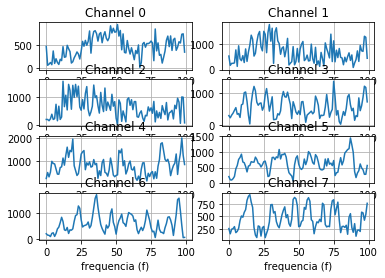

In [17]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("frequencia (f)")
    column = "Sensor "+str(i)
    l = list(Dataset_ruim.get(column))
    plt.plot(abs(np.fft.rfft(l)[:100]))
    plt.grid()

plt.draw()
plt.show()

# Carregar csv das features ( preprocessado fora do jupyter)

In [19]:
url = './datasets/oficial/features.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset_0 = pd.read_csv(url)
Dataset = Dataset_0.drop('Label',axis=1)
# print(Dataset.head(10))

from sklearn.decomposition import PCA
X = Dataset.values
# print(X)
pca = PCA(n_components=6)
fit = pca.fit_transform(X)
fit2 = pca.fit(X)
print("Explained Variance: ", fit2.explained_variance_ratio_)
# print(fit.components_)
print(sum(fit2.explained_variance_ratio_))

principalDf = pd.DataFrame(data=fit, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'])

finalDf = pd.concat([principalDf, Dataset_0['Label']], axis=1)



Explained Variance:  [0.33577948 0.28251259 0.18540776 0.0663821  0.06124542 0.02239697]
0.9537243301701038


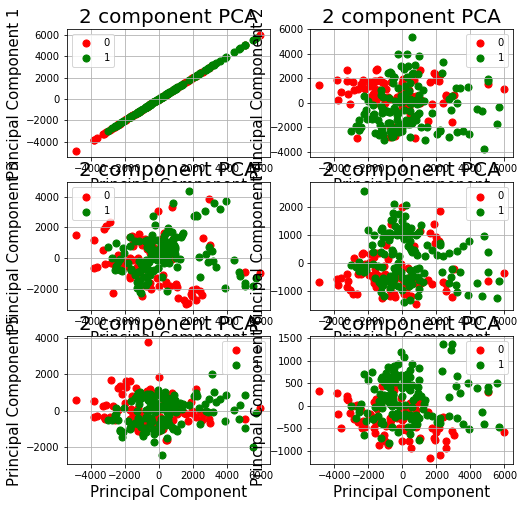

In [71]:

pca_index = '1'

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,8))
row = 0
col = 0
for i in range(6):
    #fig = plt.figure(figsize = (8,8))
    if i%2 == 0:
        col =0
    else:
        col=1
#     print(row,col)
    #index_1 = str(i +1)
    ax[row,col].set_xlabel('Principal Component', fontsize = 15)
    ax[row,col].set_ylabel('Principal Component '+ str(i+1), fontsize = 15)
    ax[row,col].set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Label'] == target
        ax[row,col].scatter(finalDf.loc[indicesToKeep, 'Feature '+pca_index]
                   , finalDf.loc[indicesToKeep,'Feature '+ str(i+1)]
                   , c = color
                   , s = 50)
    ax[row,col].legend(targets)
    ax[row,col].grid()
    if i % 2 and i!=0: 
        row += 1

plt.draw()
plt.show()


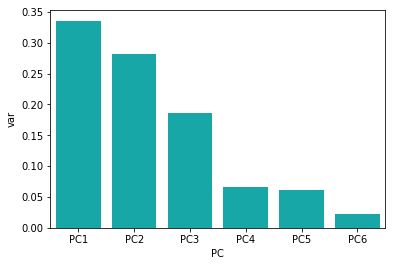

In [33]:
import seaborn as sns
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", data=df, color="c");

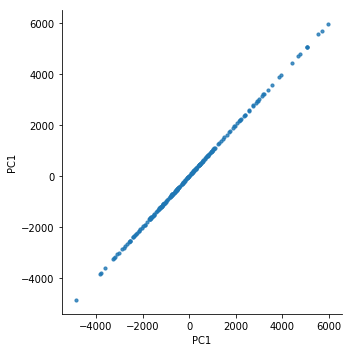

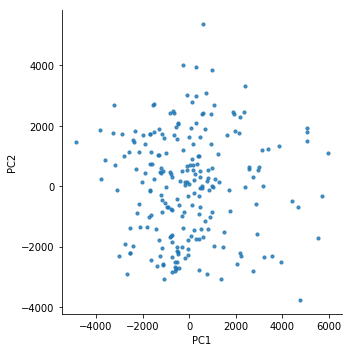

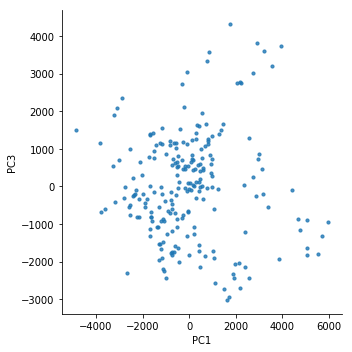

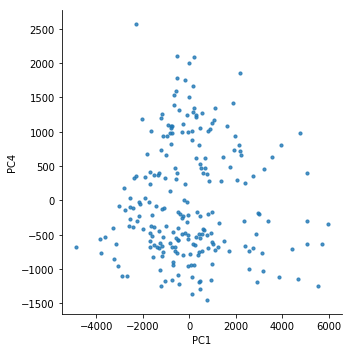

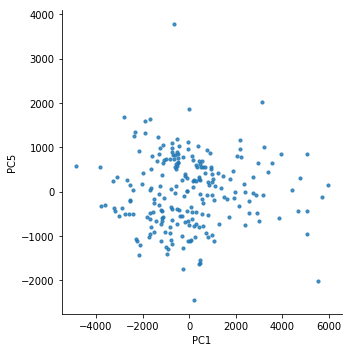

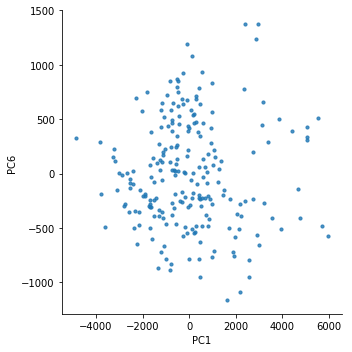

In [38]:
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2','PC3','PC4','PC5','PC6'])
pc_df.head()
for i in range(6):
    sns.lmplot( x="PC1", y="PC"+str(i+1),
      data=pc_df, 
      fit_reg=False, 
      legend=True,
      scatter_kws={"s": 10}) # specify the point size